In [1]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 1.6 MB/s eta 0:01:34
   ---------------------------------------- 1.0/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 1.3/150.0 MB 1.4 MB/s eta 0:01:45
   ---------------------------------------- 1.6/150.0 MB 1.6 MB/s eta 0:01:36
    --------------------------------------- 2.1/150.0 MB 1.6 MB/s eta 0:01:35
    --------------------------------------- 2.4/150.0 MB 1.6 MB/s eta 0:01:35
    --------------------------------------- 2.9/150.0 MB 1.6 MB/s eta 0:01:32
    --------------------------------------- 3.1/150.0 MB 1.6 MB/s eta 0:01:30
    --------------------------------------- 3.4/150.0 MB 1.6 MB/s eta 0:01:31
   - -------------------------------------- 3.9/150.0 MB 1.6 MB/s eta 0:01:30
   - --

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [9]:
# Load Data
df = pd.read_csv("diabetes.csv")
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
X=df.drop('class',axis=1)
y=df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print("--------------------------------------------------------------------")
print(X_test_scaled)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]
--------------------------------------------------------------------
[[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160

In [45]:
xgb = XGBClassifier(use_label_encode = False, eval_metric="logloss",random_state=42)
param_grid = {
    'n_estimators':[100,150,200,300],
    'learning_rate':[0.01,0.1,0.15],
    'max_depth':[2,3,4,5],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0]
}
#Stratified K-Fold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=skf,
                           scoring='recall',
                           n_jobs=-1,
                           verbose=1)

In [61]:
# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Find the best model_best cross validated recall score
best_model = grid_search.best_estimator_ 
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Recall:", grid_search.best_score_)
# Predictions on test set
y_pred = best_model.predict(X_test_scaled)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validated Recall: 0.6718715393133997


C:\Users\bachu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:13:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encode" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [73]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Confusion Matrix: [[ 1 98]
 [ 1 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.50      0.01      0.02        99
           1       0.36      0.98      0.52        55

    accuracy                           0.36       154
   macro avg       0.43      0.50      0.27       154
weighted avg       0.45      0.36      0.20       154



In [75]:
best_model.feature_importances_

array([0.08842377, 0.22876793, 0.08689018, 0.09103801, 0.10306238,
       0.13483676, 0.10317033, 0.16381069], dtype=float32)

In [69]:
features = pd.DataFrame(best_model.feature_importances_, index = df.iloc[:,:-1].columns, columns=["Importances"])
df1= features.sort_values(by = "Importances")

<Axes: xlabel='None', ylabel='Importances'>

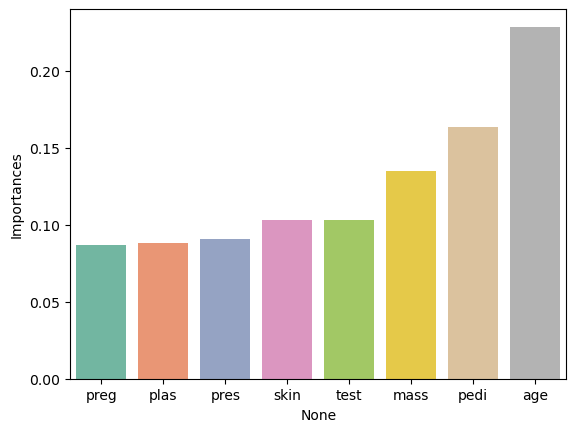

In [71]:
import seaborn as sns
sns.barplot(data = df1, x= features.index, y= "Importances", hue = features.index,palette = "Set2")